In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the dataset
data = pd.read_csv('student_data.csv')
#The predicted learning disability diagnosis is:
# Display the first few rows of the dataset
print(data.head())

ModuleNotFoundError: No module named 'pandas'

In [8]:
# Exploratory Data Analysis (EDA)
# Check for missing values and data types
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Student ID                              100000 non-null  int64  
 1   Age                                     100000 non-null  int64  
 2   Grade Level                             100000 non-null  int64  
 3   Gender                                  100000 non-null  object 
 4   Reading Age Assessment                  100000 non-null  float64
 5   Math Score                              100000 non-null  int64  
 6   Reading Fluency (WPM)                   100000 non-null  int64  
 7   Completion Rate (Average)               100000 non-null  float64
 8   Time per Task (Average)                 100000 non-null  float64
 9   Distraction Count (Average)             100000 non-null  float64
 10  Learning Disability Diagnosis (if any)  10000

In [10]:
# Get descriptive statistics
print(data.describe())

          Student ID            Age    Grade Level  Reading Age Assessment  \
count  100000.000000  100000.000000  100000.000000           100000.000000   
mean    50000.500000      11.521590       5.503070               74.958069   
std     28867.657797       2.875972       2.289529               14.435053   
min         1.000000       7.000000       2.000000               50.000000   
25%     25000.750000       9.000000       3.000000               62.500000   
50%     50000.500000      12.000000       6.000000               74.900000   
75%     75000.250000      14.000000       7.000000               87.400000   
max    100000.000000      16.000000       9.000000              100.000000   

          Math Score  Reading Fluency (WPM)  Completion Rate (Average)  \
count  100000.000000          100000.000000              100000.000000   
mean       74.971850              89.986530                   0.790085   
std        14.666602               6.061353                   0.109793   
m

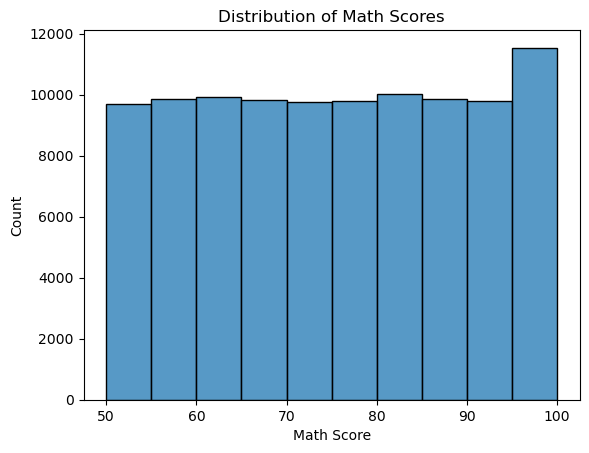

In [12]:
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of scores
sns.histplot(data['Math Score'], bins=10)
plt.title('Distribution of Math Scores')
plt.show()

In [14]:
# Filter for Dyslexia and Dyscalculia
# Filter for Dyslexia and Dyscalculia
filtered_data = data[data['Learning Disability Diagnosis (if any)'].isin(['Dyslexia', 'Dyscalculia'])]

# Display the filtered data
print(filtered_data.head())

   Student ID  Age  Grade Level  Gender  Reading Age Assessment  Math Score  \
1           2    8            3  Female                    51.4          97   
3           4    8            9    Male                    75.9          74   
4           5   15            2  Female                    84.4          55   
5           6   14            9    Male                    83.4          90   
6           7   11            4  Female                    68.7          79   

   Reading Fluency (WPM)  Completion Rate (Average)  Time per Task (Average)  \
1                     83                       0.88                    35.07   
3                     91                       0.81                    25.58   
4                     88                       0.61                    55.40   
5                     97                       0.62                    85.20   
6                     99                       0.96                    28.69   

   Distraction Count (Average) Learning Disa

In [16]:
# Step 3: Select relevant features
features = ['Reading Age Assessment', 'Math Score']
X = filtered_data[features]
y = filtered_data['Learning Disability Diagnosis (if any)']

In [22]:
# Step 4: Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [24]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [26]:
# Step 6: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Step 7: Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Save the trained model and scaler
joblib.dump(model, 'learning_disability_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [30]:
# Step 8: Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [32]:
# Step 9: Evaluate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.51
              precision    recall  f1-score   support

 Dyscalculia       0.51      0.50      0.50      2857
    Dyslexia       0.50      0.51      0.51      2851

    accuracy                           0.51      5708
   macro avg       0.51      0.51      0.51      5708
weighted avg       0.51      0.51      0.51      5708



In [34]:
# Step 10: Display predictions with corresponding disabilities
predicted_disabilities = label_encoder.inverse_transform(y_pred)
predictions_df = pd.DataFrame({
    'Predicted Disability': predicted_disabilities,
    'Reading Age Assessment': X_test['Reading Age Assessment'].values,
    'Math Score': X_test['Math Score'].values,
})

print(predictions_df)



     Predicted Disability  Reading Age Assessment  Math Score
0             Dyscalculia                    69.0          85
1             Dyscalculia                    96.0          60
2             Dyscalculia                    50.5          64
3                Dyslexia                    98.5          59
4                Dyslexia                    56.7          63
...                   ...                     ...         ...
5703             Dyslexia                    97.5          80
5704          Dyscalculia                    51.5          55
5705          Dyscalculia                    74.5          93
5706             Dyslexia                    80.3          64
5707          Dyscalculia                    60.3          62

[5708 rows x 3 columns]


In [2]:
# Step 10: Function for user input prediction
def predict_disability():
    print("Enter student details for prediction:")
    reading_age = float(input("Reading Age Assessment (e.g., 89.6): "))
    math_score = float(input("Math Score (e.g., 89): "))
    
    # Create DataFrame for input
    user_input = pd.DataFrame([[reading_age, math_score]], columns=features)
    
    # Scale user input using the same scaler
    user_input_scaled = scaler.transform(user_input)
    
    # Make prediction
    prediction = model.predict(user_input_scaled)
    
    # Decode prediction to original label
    predicted_label = label_encoder.inverse_transform(prediction)
    
    print(f"Predicted Learning Disability Diagnosis: {predicted_label[0]}")

# Call the function to get user input and make a prediction
predict_disability()

Enter student details for prediction:


NameError: name 'pd' is not defined